**Naive Bayes is good algorithm for working with text classification**

When dealing with text, it’s very common to treat each unique word as a feature, and since the typical person’s vocabulary is many thousands of words, this makes for a large number of features. The relative simplicity of the algorithm and the independent features assumption of Naive Bayes make it a strong performer for classifying texts.

How Naive Bayes Classifier works?http://stackoverflow.com/questions/10059594/a-simple-explanation-of-naive-bayes-classification

So far, we have talked only about one piece of evidence. In reality, we have to predict an outcome given multiple evidence. In that case, the math gets very complicated. To get around that complication, one approach is to 'uncouple' multiple pieces of evidence, and to treat each of piece of evidence as independent. This approach is why this is called naive Bayes.

P(Outcome|Multiple Evidence) = 
P(Evidence1|Outcome) * P(Evidence2|outcome) * ... * P(EvidenceN|outcome) * P(Outcome)
scaled by P(Multiple Evidence)

                      
P(outcome|evidence) = 
     P(Likelihood of Evidence) * Prior prob of outcome
     ______________________________________________
                       P(Evidence)

### Step 1  Create data, split train and test into two groups
#### normally, 70%~75% allocated to the train. the rest to the test

In [1]:
import random
def makeTerrainData(n_points =1000):
    random.seed(42)
    grade = [random.random() for ii in range(0, n_points)]
    bumpy = [random.random() for ii in range(0, n_points)]
    error = [random.random() for ii in range(0, n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0, n_points)]
    
    for ii in range(0, len(y)):
        if grade[ii] >0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0
            
## split into train/test sets
    x = [[gg, ss] for gg,ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    x_train = x[0:split]
    x_test = x[split:]
    y_train = y[0:split]
    y_test = y[split:]

    return x_train, y_train, x_test, y_test

### Step 2  Create model 
#### normally, return predict

In [2]:
from sklearn.naive_bayes import GaussianNB

def classify(features_train, labels_train):
    gnb = GaussianNB()
    y_pred = gnb.fit(features_train, labels_train)
    return y_pred

### Step 3 Visualization presentation

In [3]:
#!/usr/bin/python

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min=0.0;x_max=1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")


### Step 4  Main function. to see the performance of the test

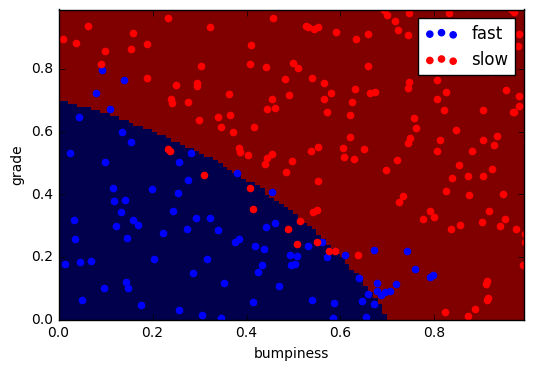

In [25]:
features_train, labels_train, features_test, labels_test = makeTerrainData()
clf = classify(features_train, labels_train)
import numpy as np
import pylab as pl
%matplotlib inline
prettyPicture(clf, features_test, labels_test)

### Step 5 Calculate the accuracy
#### accuracy is defined as the number of test points that are classified correctly divided by the total number of test points.

In [41]:
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
score = accuracy_score(labels_test, pred)
print(("'Accuracy_score': '{}'".format(score)))

'Accuracy_score': '0.884'
